In [155]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
NUM_ROLLS = 100_000

In [156]:
def roll():
    '''function to simulate the roll of 2 cube dice,
        returns a tuple of the two faces, range 1-6'''
    return [randint(1,6) + randint(1,6) for i in range(NUM_ROLLS)]

trial_rolls = roll()

We roll 2 dice 1 million times, so as to have the law of large numbers work out any 'hot' or 'cold' streaks. We want to compare strategies against the same rolls of the dice, so that there are no potential biases based on statistically odd outcomes. We will compare a number of different strategies and by doing so, hope to find the most effective one. We can define effective as making the most profit.

[2782, 5533, 8439, 11080, 13593, 16808, 13881, 11149, 8409, 5494, 2832]


'a simple histogram, showing that there are no oddities in the frequencies of certain rolls, and this is establishing that the number of rolls done are usable for this experiment'

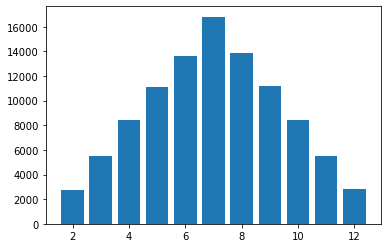

In [157]:
#results to hold the results of the trial to demonstrate that the dice rolls will follow a generally random distribution
results = [0 for i in range(11)]

#do 1 million rolls to remove any oddities through the law of large numbers
for i in trial_rolls:
    #since the outcomes of 2 cube dice is [2,12], we want to make sure that the 11 outcomes are stored in the correct spots
    results[i-2] += 1

#display the outcomes
print(results)
#show the histogram
plt.bar(np.linspace(2,12,11),results)
'''a simple histogram, showing that there are no oddities in the frequencies of certain rolls, and this is establishing that the number of rolls done are usable for this experiment'''

Our first strategy to look at is simply betting the PASS-LINE bet. This bet will immediately pay 1:1 when the dice come up with either a 7 or an 11. This bet will lose when a 2, 3, or 12 are rolled. should any (4, 5, 6, 8, 9, 10) be rolled, that value will now become the point. The goal now is to roll dice so as to get the point-value again, which causes the bet to pay 1:1. Should a 7 be rolled, the bet loses. Any other numbers have no effect on the PASS-LINE bet.  

Throughout, we will be using a bankroll that is shown to be starting at 100. This is representative of 100 units of betting. For example, if your standard bet is 5.00 dollars , then 100 units would be 500.00 dollars. The goal of this is to make any strategy standardized and not fall into the trap of bet big, win big thinking.

In [158]:
'''Basic Implementation of the Pass-Line betting strategy'''

pass_bankroll = [100]
i = 0
while(i < len(trial_rolls)):
    outcome = trial_rolls[i]
    i+=1
    #see if we got lucky on the come out
    if outcome == 7 or outcome == 11:
        pass_bankroll.append(pass_bankroll[-1]+1)
        continue
    #check unlucky
    elif outcome == 2 or outcome == 3 or outcome == 12:
        pass_bankroll.append(pass_bankroll[-1]-1)
        continue
    #else establish the point
    else:
        point = outcome
        while True:
            #just to avoid the case of running out of trial rolls, we will supplement them with ones generated here. this
            #will only play a minor impact on the very last rolls, not more than 20 rolls. 
            if i >= len(trial_rolls):
                outcome = sum((randint(1,6), randint(1,6)))
            else:
                outcome = trial_rolls[i]
                i+=1
                
            if outcome == point:
                pass_bankroll.append(pass_bankroll[-1]+1)
                break
            if outcome == 7:
                pass_bankroll.append(pass_bankroll[-1]-1)
                break



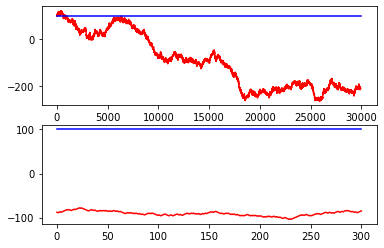

In [159]:
#feel free to re-run this block multiply times, it will show you random ranges of 300 comeout rolls and the payroll changes.
#this is done to show that there might be times where the PASS-LINE bet is winning, but on the longterm it always loses. 
fig, ax = plt.subplots(2)
ax[0].plot(np.linspace(0,len(pass_bankroll)-1,len(pass_bankroll)), pass_bankroll, c='r')
ax[0].plot(np.linspace(0, 30000,100), [100 for i in range(100)], c='b')
random_start_point = randint(0, 29500)

ax[1].plot(np.linspace(0, 300, 300), pass_bankroll[random_start_point:random_start_point+300], c='r')
ax[1].plot(np.linspace(0, 300,10), [100 for i in range(10)], c='b')

We can see that the basic pass-line strategy is not effective over the long term, even though there might be times were it shows promise in the short term. Keep in mind, even if the bankroll is going up locally, we have not made any money until it exceeds the 100 threshold, represented by the blue line. 

Next we can explore the DONT-PASS bet, which is almost the opposite of the PASS-LINE bet. the DONT-PASS will pay 1:1 on rolls of 2 or 3, and lose on rolls of 7 or 11. The bet will push on rolls of 12. Should a (4, 5, 6, 8, 9, 10) be rolled, that value will be the point. Now the DONT-PASS line will win 1:1 should a 7 be rolled before the point. Should the point be rolled first, the bet will lose.

I believe that the DONT-PASS bet is a critical element to winning in craps, because you get paid when the 7 rolls, unless it is rolled first. Since a 7 has the best odds of being rolled at any given time, if we can make it past the first roll, now probability is in our favor. 

In [160]:
dp_bankroll = [100]
i = 0
while(i < len(trial_rolls)):
    outcome = trial_rolls[i]
    i+=1
    #see if a losing value was roled
    if outcome == 7 or outcome == 11:
        dp_bankroll.append(dp_bankroll[-1]-1)
        continue
    #check a win
    elif outcome == 2 or outcome == 3:
        dp_bankroll.append(dp_bankroll[-1]+1)
        continue
    elif outcome == 12:
        dp_bankroll.append(dp_bankroll[-1])
    #else establish the point
    else:
        point = outcome
        while True:
            #just to avoid the case of running out of trial rolls, we will supplement them with ones generated here. this
            #will only play a minor impact on the very last rolls, not more than 20 rolls. 
            if i >= len(trial_rolls):
                outcome = sum((randint(1,6), randint(1,6)))
            else:
                outcome = trial_rolls[i]
                i+=1
                
            if outcome == point:
                dp_bankroll.append(dp_bankroll[-1]-1)
                break
            if outcome == 7:
                dp_bankroll.append(dp_bankroll[-1]+1)
                break



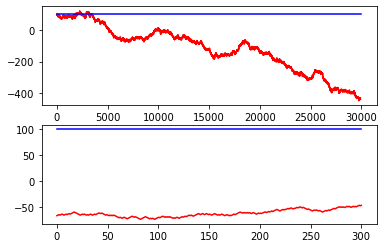

In [193]:
#feel free to re-run this block multiply times, it will show you random ranges of 300 comeout rolls and the payroll changes.
fig, ax = plt.subplots(2)
ax[0].plot(np.linspace(0,len(dp_bankroll)-1,len(dp_bankroll)), dp_bankroll, c='r')
ax[0].plot(np.linspace(0, 30000,100), [100 for i in range(100)], c='b')
random_start_point = randint(0, 29500)

ax[1].plot(np.linspace(0, 300, 300), dp_bankroll[random_start_point:random_start_point+300], c='r')
ax[1].plot(np.linspace(0, 300,10), [100 for i in range(10)], c='b')